Aperçu du dataset :
    temperature  pluie  soleil   vetement
0            10      1       0  Parapluie
1            12      0       0       Pull
2             8      1       0  Parapluie
3            14      0       0       Pull
4            16      0       1    T-shirt
5            18      0       1    T-shirt
6            20      0       0       Pull
7            22      0       1    T-shirt
8            17      0       0       Pull
9            13      1       0  Parapluie
10            9      1       0  Parapluie
11           19      0       1    T-shirt

Taille train : (8, 3)
Taille test  : (4, 3)

Accuracy sur le jeu de test : 1.0

Prédictions sur quelques exemples :
Temp=12°, Pluie=1, Soleil=0 → Parapluie
Temp=12°, Pluie=0, Soleil=0 → Pull
Temp=20°, Pluie=0, Soleil=1 → T-shirt
Temp=18°, Pluie=0, Soleil=0 → Pull


/Users/ikram/miniconda3/envs/tf-arm/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


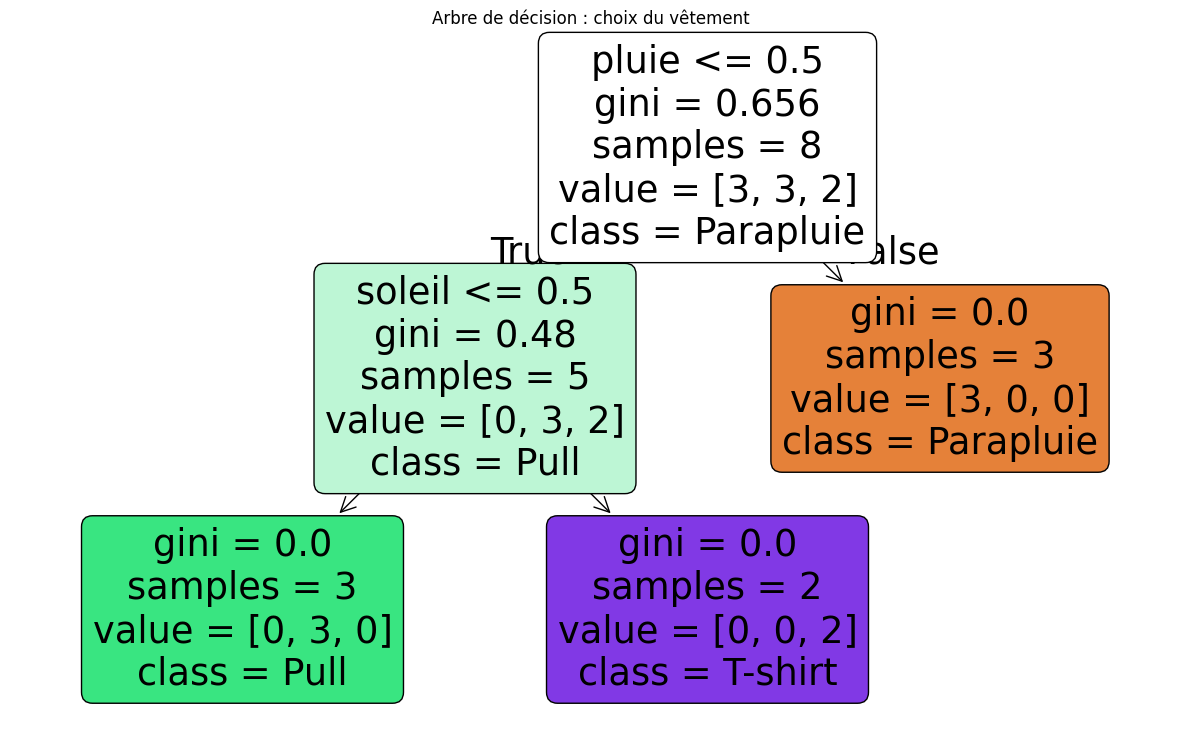

In [2]:
# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# =========================
# 2. Création du jeu de données
#    Règle voulue (comme sur le schéma) :
#    - Si Temp <= 15° → on regarde "Pluie ?"
#        - Pluie = Oui  → "Parapluie"
#        - Pluie = Non  → "Pull"
#    - Si Temp > 15° → on regarde "Soleil ?"
#        - Soleil = Oui → "T-shirt"
#        - Soleil = Non → "Pull"
# =========================

# Quelques jours fictifs
data = {
    "temperature": [10, 12, 8, 14, 16, 18, 20, 22, 17, 13, 9, 19],
    "pluie":       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],  # 1 = Oui, 0 = Non
    "soleil":      [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1],  # 1 = Oui, 0 = Non
}

# On applique la règle à la main pour générer les étiquettes (vêtements)
labels = []
for temp, rain, sun in zip(data["temperature"], data["pluie"], data["soleil"]):
    if temp <= 15:
        if rain == 1:
            labels.append("Parapluie")
        else:
            labels.append("Pull")
    else:
        if sun == 1:
            labels.append("T-shirt")
        else:
            labels.append("Pull")

df = pd.DataFrame(data)
df["vetement"] = labels

print("Aperçu du dataset :")
print(df)

# =========================
# 3. Séparation X (features) / y (label)
# =========================
X = df[["temperature", "pluie", "soleil"]]  # variables explicatives
y = df["vetement"]                          # variable cible

# =========================
# 4. Split train / test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTaille train :", X_train.shape)
print("Taille test  :", X_test.shape)

# =========================
# 5. Entraînement du Decision Tree
# =========================
# max_depth=3 pour avoir un arbre simple, proche de ton schéma
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# =========================
# 6. Évaluation rapide
# =========================
accuracy = model.score(X_test, y_test)
print("\nAccuracy sur le jeu de test :", accuracy)

# =========================
# 7. Exemple de prédictions
# =========================
# Quelques "jours" de test manuels :
# format : [temperature, pluie(0/1), soleil(0/1)]
exemples = np.array([
    [12, 1, 0],  # 12°, pluie → Parapluie (attendu)
    [12, 0, 0],  # 12°, pas de pluie → Pull
    [20, 0, 1],  # 20°, soleil → T-shirt
    [18, 0, 0],  # 18°, pas de soleil → Pull
])

pred = model.predict(exemples)
print("\nPrédictions sur quelques exemples :")
for x, p in zip(exemples, pred):
    print(f"Temp={x[0]}°, Pluie={x[1]}, Soleil={x[2]} → {p}")

# =========================
# 8. Affichage du graphe de l'arbre de décision
# =========================
plt.figure(figsize=(15, 9))
plot_tree(
    model,
    feature_names=["temperature", "pluie", "soleil"],
    class_names=model.classes_,
    filled=True,
    rounded=True
)
plt.title("Arbre de décision : choix du vêtement")
plt.show()
